**Case:** **File** -#**001** -**Burnout_Breakdown** [DAY-01]


---



Dataset: Mental Health and Burnout in the Workplace


---

Environment Setup  
We begin by importing all the essential Python libraries required for data manipulation, visualization, and suppressing unwanted warnings.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

Mounting Google Drive  
To access the dataset stored in my Google Drive, I mount it using drive.mount This allows me to read and write files directly from my Drive in Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the Dataset   
I loaded the dataset directly from my Google Drive using pandas.read_csv().And using df.head(), we printed the first few rows of the dataset.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ACM-TASKS/mental_health_workplace_survey.csv')
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,5.06,9.47,4.16,7.0,7.9,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,2.00,5.65,3.74,7.2,9.0,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,7.17,5.70,8.80,5.2,9.7,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,3.76,6.40,4.69,8.7,5.8,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,2.34,3.41,2.12,4.2,3.3,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


Initial Exploration   
We found the dataset's structure using .shape, .info(), and .describe(). This gave us the total number of rows and columns, identified the data types and missing values.



In [ ]:
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

print("Data Types and Non-Null Counts:\n"),df.info()
print("Summary statistics for numeric columns\n",df.describe())

Total Rows: 3000
Total Columns: 25
Data Types and Non-Null Counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3

Handling Missing Values      

This command checks for missing values in the dataset. It counts the number of null (missing) entries in each column and sorts the results in descending order to highlight columns with the most missing data.



In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
EmployeeID,0
Age,0
Gender,0
Country,0
JobRole,0
Department,0
YearsAtCompany,0
WorkHoursPerWeek,0
RemoteWork,0
BurnoutLevel,0


It is found that there are no missing values and all columns are have complete data.

In this step, we handled missing values, for numeric columns, we used the median to fill any gaps, which is robust against outliers.For categorical columns, we used the mode (most frequent value).

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f"Filled missing values in {col} with median: {median_val}")

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    print(f"Filled missing values in {col} with mode: {mode_val}")

Filled missing values in EmployeeID with median: 2500.5
Filled missing values in Age with median: 41.0
Filled missing values in YearsAtCompany with median: 10.0
Filled missing values in WorkHoursPerWeek with median: 45.0
Filled missing values in BurnoutLevel with median: 5.48
Filled missing values in JobSatisfaction with median: 5.43
Filled missing values in StressLevel with median: 5.495
Filled missing values in ProductivityScore with median: 5.49
Filled missing values in SleepHours with median: 6.6
Filled missing values in PhysicalActivityHrs with median: 5.0
Filled missing values in CommuteTime with median: 59.0
Filled missing values in ManagerSupportScore with median: 5.44
Filled missing values in MentalHealthDaysOff with median: 5.0
Filled missing values in WorkLifeBalanceScore with median: 5.425
Filled missing values in TeamSize with median: 25.0
Filled missing values in CareerGrowthScore with median: 5.58
Filled missing values in BurnoutRisk with median: 0.0
Filled missing value

Detecting and Handling Outliers     
The boxplots for WorkHoursPerWeek, SleepHours, and StressLevel help visualize data distribution and detect potential outliers. Values outside the whiskers indicate extremes that may affect analysis or model accuracy.


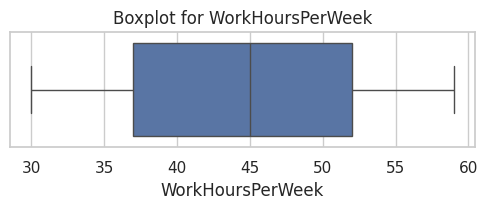

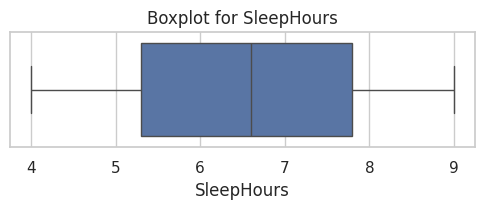

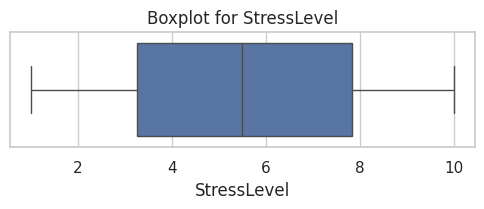

In [ ]:
features = ['WorkHoursPerWeek', 'SleepHours', 'StressLevel']


for col in features:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

The boxplots show that Work Hours, Sleep Hours, and Stress Level have values mostly in a normal range. There are no unusual or extreme values (outliers) in these columns.

This code defines a function to remove outliers using the Interquartile Range (IQR) method. It then applies this function to detect and remove outliers from key features like WorkHoursPerWeek, SleepHours, and StressLevel

In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    original_size = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    removed = original_size - df.shape[0]
    print(f"{removed} outliers removed from '{col}'")
    return df

for col in ['WorkHoursPerWeek', 'SleepHours', 'StressLevel']:
    df = remove_outliers_iqr(df, col)


0 outliers removed from 'WorkHoursPerWeek'
0 outliers removed from 'SleepHours'
0 outliers removed from 'StressLevel'


The IQR method was used to remove outliers from WorkHoursPerWeek, SleepHours, and StressLevel. However, no extreme values were found, so no rows were removed.

Exploratory Data Analysis (EDA)    
This countplot shows how many employees are experiencing burnout vs those who aren’t. It helps us understand the class balance in the target variable before further analysis or modeling.

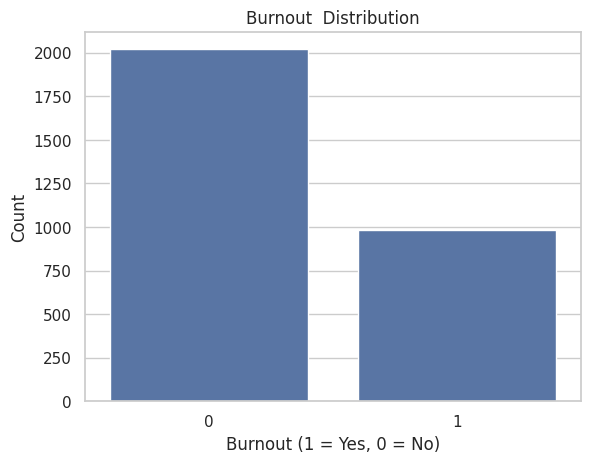

In [ ]:
sns.countplot(x='Burnoutrisk', data=df)
plt.title("Burnout Distribution")
plt.xlabel("Burnout (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

Insight    
The chart shows that most employees (around 2000) are not experiencing burnout. However, a significant portion (around 1000) experience burnout.

This boxplot shows how sleep hours vary with burnout.

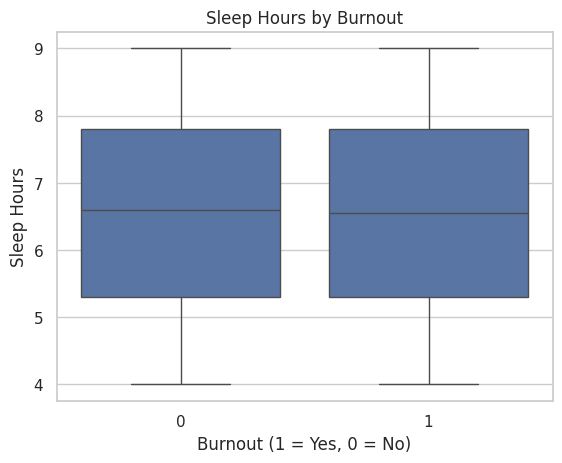

In [ ]:
sns.boxplot(x='BurnoutRisk', y='SleepHours', data=df)
plt.title("Sleep Hours by Burnout")
plt.xlabel("Burnout (1 = Yes, 0 = No)")
plt.ylabel("Sleep Hours")
plt.show()

Insight   
People with burnout usually get slightly less sleep than those without burnout.

This code creates a scatterplot showing the relationship between sleep hours and stress levels. It uses color to indicate whether a person is at risk of burnout (BurnoutRisk).


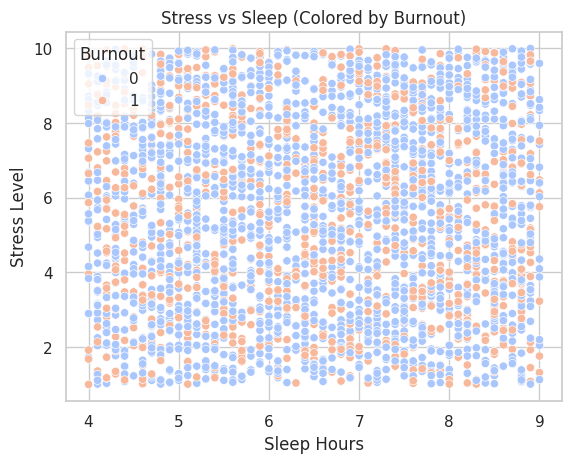

In [ ]:
sns.scatterplot(x='SleepHours', y='StressLevel', hue='BurnoutRisk', data=df, palette='coolwarm')
plt.title("Stress vs Sleep (Colored by Burnout)")
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.legend(title="Burnout")
plt.show()

Insigght   
This scatterplot shows that people with higher stress and lower sleep are more likely to experience burnout (red points).

Correlation Heatmap     
This code generates a heatmap showing how numerical features in the dataset are correlated with each other.

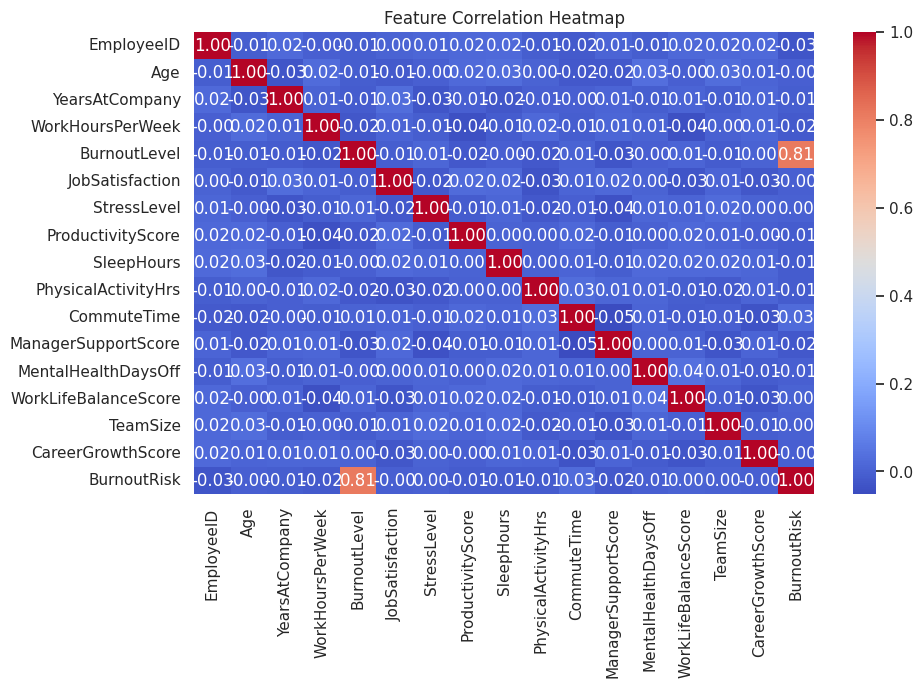

In [ ]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Insight   
The heatmap shows that BurnoutRisk has a strong positive correlation (0.81) with BurnoutLevel.

Summary    
In this notebook, we:

Cleaned missing values using appropriate strategies     
Removed outliers using IQR method    
Created 3 core visualizations to explore stress, sleep, and burnout

This command saves the cleaned and processed dataset as a new CSV file named cleaned_burnout_dataset.csv

In [ ]:
df.to_csv("cleaned_burnout_dataset.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.
